In [1]:
pip install geopandas

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 6.5MB 12.9MB/s 
     |████████████████████████████████| 14.8MB 280kB/s 


In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes

In [6]:
import requests
import tempfile
import zipfile

temporary_location = tempfile.gettempdir()
def download_unzip(url, dirname = tempfile.gettempdir(), destname = "borders"):
  myfile = requests.get(url)
  open(dirname + '/' + destname + '.zip', 'wb').write(myfile.content)
  with zipfile.ZipFile(dirname + '/' + destname + '.zip', 'r') as zip_ref:
      zip_ref.extractall(dirname + '/' + destname)

download_unzip('https://www.data.gouv.fr/fr/datasets/r/07b7c9a2-d1e2-4da6-9f20-01a7b72d4b12')
communes_borders = gpd.read_file(temporary_location + "/borders/communes-20190101.json")
communes_borders.head()

,insee,nom,wikipedia,surf_ha,geometry
0,97223,Saint-Esprit,fr:Saint-Esprit (Martinique),2318,"POLYGON ((-60.93595 14.58812, -60.93218 14.585..."
1,97233,Le Morne-Vert,fr:Le Morne-Vert,1325,"POLYGON ((-61.12165 14.71928, -61.11852 14.716..."
2,97208,Fonds-Saint-Denis,fr:Fonds-Saint-Denis,2374,"POLYGON ((-61.13355 14.74657, -61.13066 14.748..."
3,97224,Saint-Joseph,fr:Saint-Joseph (Martinique),4324,"POLYGON ((-61.08459 14.72510, -61.08430 14.722..."
4,97212,Gros-Morne,fr:Gros-Morne,4601,"POLYGON ((-61.08459 14.72510, -61.08061 14.725..."


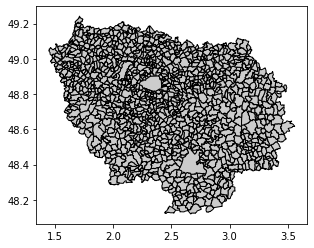

In [7]:
data_borders = communes_borders.set_index('insee')
data_borders['dep'] = data_borders.index.str[:2]
communes = data_borders.loc[data_borders['dep'].isin(['75','77','78','91','92','93','94','95'])].plot(color='0.8', edgecolor='black')
communes


# Points de contact Véligo 

Données disponibles au lien suivant : https://smartregionidf.opendatasoft.com/explore/dataset/points-de-contact-veligo-location/information/

---



In [8]:
veligo = gpd.read_file('https://smartregionidf.opendatasoft.com/explore/dataset/points-de-contact-veligo-location/download/?format=geojson&timezone=Europe/Berlin&lang=fr')

In [9]:
veligo.head()

,mardi,reparation,y_wgs84,location,ville,code_post,vendredi,adresse,aide,jeudi,lundi,nom,dimanche,samedi,training,infos,x_wgs84,id,mercredi,geometry
0,8h00 - 17h00,non,48.802526,oui,SAINT MAUR DES FOSSÉS,94100,8h00 - 17h00,46 avenue Foch,non,8h00 - 17h00,8h00 - 17h00,ST MAUR DES FOSSES PDC,Fermé,8h00 - 12h00,non,oui,2.491293,3000,8h00 - 17h00,POINT (2.49129 48.80253)
1,8h00 - 18h00,non,48.829547,oui,BRY SUR MARNE,94360,8h00 - 18h00,6 rue du Clos Sainte Catherine,non,8h00 - 18h00,8h00 - 18h00,BRY PPDC1,Fermé,8h00 - 12h00,non,oui,2.524548,3002,8h00 - 18h00,POINT (2.52455 48.82955)
2,7h00 - 18h00,non,48.777900,oui,CRETEIL,94000,7h00 - 18h00,50 avenue de la France libre,non,7h00 - 18h00,7h00 - 18h00,CRETEIL PPDC1,Fermé,7h00 - 12h00,non,oui,2.454900,3003,7h00 - 18h00,POINT (2.45490 48.77790)
3,8h00 - 17h00,non,48.849355,oui,FONTENAY SOUS BOIS,94120,8h00 - 17h00,30 rue Guérin Leroux,non,8h00 - 17h00,8h00 - 17h00,FONTENAY SOUS BOIS PDC1,Fermé,8h00 - 11h00,non,oui,2.475313,3004,8h00 - 17h00,POINT (2.47531 48.84936)
4,8h00 - 17h30,non,48.806700,oui,IVRY SUR SEINE,94200,8h00 - 17h30,47 bis rue Ernest Renan,non,8h00 - 17h30,8h00 - 17h30,IVRY PDC1,Fermé,8h00 - 12h00,non,oui,2.401500,3005,8h00 - 17h30,POINT (2.40150 48.80670)


NB : cette BDD contient des informations sur les horaires et jours de disponibilités des Véligo -> à prendre en compte pour les trajets

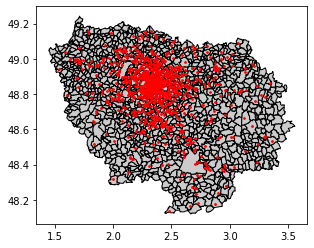

In [10]:
fig, ax = plt.subplots()
data_borders.loc[data_borders['dep'].isin(['75','77','78','91','92','93','94','95'])].plot(ax=ax, color='0.8', edgecolor='black')
veligo.plot(ax=ax, color='red', markersize=3)
plt.show()

# Cristolib et Vélo2 en libre-service à Créteil

Données disponibles aux liens suivants : 
- https://smartregionidf.opendatasoft.com/explore/dataset/cristolib_-_velos_en_libre-service_a_creteil/information/
- https://smartregionidf.opendatasoft.com/explore/dataset/jcdecaux-bike-stations-data/information/


In [11]:
velos = gpd.read_file('https://smartregionidf.opendatasoft.com/explore/dataset/jcdecaux-bike-stations-data/download/?format=geojson&timezone=Europe/Berlin&lang=fr')
cristolib = gpd.read_file('https://smartregionidf.opendatasoft.com/explore/dataset/cristolib_-_velos_en_libre-service_a_creteil/download/?format=geojson&timezone=Europe/Berlin&lang=fr')

In [12]:
cristolib.head()

,name,number,longitude,address,latitude,geometry
0,09 - EUROPARC,9,2.471315,ALLEE FERNAND POUILLON,48.766038,POINT (2.47131 48.76604)
1,08 - ROND POINT HOTEL DE VILLE,8,2.455378,Avenue de la France Libre,48.777352,POINT (2.45538 48.77735)
2,04 - UNIVERSITE - MAIL DES MECHES,4,2.446249,Avenue du Général de Gaulle,48.788111,POINT (2.44625 48.78811)
3,02 - HOPITAL INTERCOMMUNAL (CHIC),2,2.463706,AVENUE DE VERDUN,48.796174,POINT (2.46371 48.79617)
4,01 - LATTRE DE TASSIGNY,1,2.453876,AVENUE DU MARECHAL DE LATTRE DE TASSIGNY,48.798835,POINT (2.45388 48.79884)


In [13]:
velos.loc[velos['contract_name'].isin(['creteil'])].head()

,status,contract_name,name,bonus,bike_stands,number,last_update,available_bike_stands,banking,available_bikes,address,geometry
0,OPEN,creteil,08 - ROND POINT HOTEL DE VILLE,False,34,8,2020-12-04T03:11:15+01:00,19,True,15,Avenue de la France Libre,POINT (2.45538 48.77735)
18,OPEN,creteil,05 - GENERAL LECLERC / BARRAGE,False,18,5,2020-12-06T00:04:12+01:00,15,True,3,144 RUE DU GENERAL LECLERC,POINT (2.46857 48.78684)
20,OPEN,creteil,04 - UNIVERSITE - MAIL DES MECHES,False,40,4,2020-12-06T00:04:08+01:00,26,True,14,Avenue du Général de Gaulle,POINT (2.44625 48.78811)
24,OPEN,creteil,02 - HOPITAL INTERCOMMUNAL (CHIC),False,22,2,2020-12-06T00:04:45+01:00,14,True,8,AVENUE DE VERDUN,POINT (2.46371 48.79617)
31,OPEN,creteil,07- AVENUE DU DOCTEUR PAUL CASALIS,False,20,7,2020-12-06T00:06:55+01:00,16,True,2,Avenue du docteur Paul Casalis,POINT (2.46969 48.78021)


La colonne "available_bikes" est mise à jour en temps réel !

In [14]:
cristolib.count

<bound method DataFrame.count of                                           name  number  longitude  \
0                                09 - EUROPARC       9   2.471315   
1               08 - ROND POINT HOTEL DE VILLE       8   2.455378   
2            04 - UNIVERSITE - MAIL DES MECHES       4   2.446249   
3            02 - HOPITAL INTERCOMMUNAL (CHIC)       2   2.463706   
4                      01 - LATTRE DE TASSIGNY       1   2.453876   
5                     06 - AVENUE DE LA BRECHE       6   2.454576   
6  03 - RUE DU GENERAL LECLERC - CENTRE ANCIEN       3   2.464890   
7               05 - GENERAL LECLERC / BARRAGE       5   2.468567   
8           07- AVENUE DU DOCTEUR PAUL CASALIS       7   2.469692   
9                                10 - MAGELLAN      10   2.456665   

                                    address   latitude  \
0                    ALLEE FERNAND POUILLON  48.766038   
1                 Avenue de la France Libre  48.777352   
2               Avenue du Général

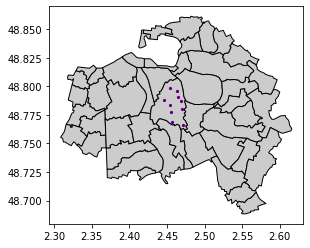

In [15]:
fig, ax = plt.subplots()
data_borders.loc[data_borders['dep'].isin(['94'])].plot(ax=ax, color='0.8', edgecolor='black')
cristolib.plot(ax=ax, color='red', markersize=5)
velos.loc[velos['contract_name'].isin(['creteil'])].plot(ax=ax, color='blue', markersize=2)
plt.show()

Les points des 2 BDD se superposent donc elles continennent les mêmes stations pour Crétéil.
De plus, BDD très légères car seulement 9 points + ne concernent que Créteil




---

# Cristolib et Vélo2 en libre-service dans le 95

Données disponibles aux liens suivants : 
- https://smartregionidf.opendatasoft.com/explore/dataset/jcdecaux-bike-stations-data/information/
- https://smartregionidf.opendatasoft.com/explore/dataset/velo2_-_cergy-pontoise_et_communes_limitrophes/information/

In [16]:
cristolib_95 = gpd.read_file('https://smartregionidf.opendatasoft.com/explore/dataset/jcdecaux-bike-stations-data/download/?format=geojson&timezone=Europe/Berlin&lang=fr')
velos2_95 = gpd.read_file('https://smartregionidf.opendatasoft.com/explore/dataset/velo2_-_cergy-pontoise_et_communes_limitrophes/download/?format=geojson&timezone=Europe/Berlin&lang=fr')

In [17]:
velos.loc[velos['contract_name'].isin(['cergy-pontoise'])].head()

,status,contract_name,name,bonus,bike_stands,number,last_update,available_bike_stands,banking,available_bikes,address,geometry
1,OPEN,cergy-pontoise,53002 - PON02 - PLACE DE LA LIBÉRATION,False,20,53002,2020-12-06T00:02:42+01:00,16,False,4,Place de la Libération côté avenue de Verdun -...,POINT (2.09063 49.04440)
2,OPEN,cergy-pontoise,50009 - CER09 - RUE DU BRÛLOIR,False,11,50009,2020-12-06T00:03:31+01:00,9,False,2,"88, RUE DU BRÛLOIR ANGLE RUE DES TOULEUSES POU...",POINT (2.07718 49.02724)
3,OPEN,cergy-pontoise,50022 - CER22 - GARE CERGY GRAND CENTRE (CB),False,27,50022,2020-12-06T00:02:29+01:00,4,True,23,BOULEVARD DE L'OISE / RUE DE LA GARE - 95000 C...,POINT (2.07961 49.03604)
4,OPEN,cergy-pontoise,50014 - CER14 - AVENUE DU NORD,False,20,50014,2020-12-06T00:03:42+01:00,13,False,7,AVENUE DU NORD ANGLE ALLÉE DES ACACIAS - 95000...,POINT (2.06040 49.04322)
5,OPEN,cergy-pontoise,50023 - CER23 - LES TOULEUSES,False,20,50023,2020-12-06T00:08:59+01:00,7,False,5,AVENUE DU SUD - 95000 CERGY,POINT (2.08307 49.03066)


In [18]:
velos2.head()

,ville,name,number,longitude,dept,address,latitude,cp,geometry
0,CERGY,50009 - CER09 - RUE DU BRÛLOIR,50009,2.071980564465145,95,88 RUE DU BRÛLOIR ANGLE RUE DES TOULEUSES POUR...,49.0286831553259,95000,POINT (2.07198 49.02868)
1,PONTOISE,53002 - PON02 - PLACE DE LA LIBÉRATION,53002,2.090817351366363,95,Place de la Libération côté avenue de Verdun -...,49.04468282112117,95300,POINT (2.09082 49.04468)
2,CERGY,50022 - CER22 - GARE CERGY GRAND CENTRE (CB),50022,2.081226367153945,95,BOULEVARD DE L'OISE / RUE DE LA GARE - 95000 C...,49.035362060119965,95000,POINT (2.08123 49.03536)
3,CERGY,50012 - CER12 - PLACE DU HAUT-GENCY,50012,2.044759833610792,95,PLACE DU HAUT DE GENCY ANGLE RUE DES VENDANGES...,49.047822987655735,95000,POINT (2.04476 49.04782)
4,CERGY,50003 - CER03 - LES ESSARTS (CB),50003,2.019491026664161,95,AVENUE DES ESSARTS ANGLE BOULEVARD DE L'OISE -...,49.04205234323104,95000,POINT (2.01949 49.04205)


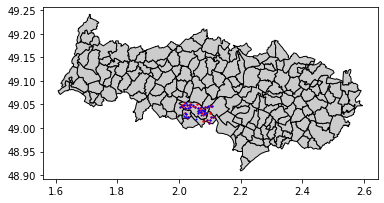

In [19]:
fig, ax = plt.subplots()
data_borders.loc[data_borders['dep'].isin(['95'])].plot(ax=ax, color='0.8', edgecolor='black')
velos.loc[velos['contract_name'].isin(['cergy-pontoise'])].plot(ax=ax, color='red', markersize=2)
velos2.plot(ax=ax, color='blue', markersize=1)
plt.show()

In [20]:
velos.loc[velos['contract_name'].isin(['cergy-pontoise'])].shape

(43, 12)

In [21]:
velos2.shape

(42, 9)

NB : penser à croiser les 2 BDD pour voir s'il y a des redondances entre les 43 points de la première et les 42 points de la deuxième

# Vélib - disponibilité en temps réel

Données disponibles au lien suivant : 
https://smartregionidf.opendatasoft.com/explore/dataset/velib-disponibilite-en-temps-reel/export/?disjunctive.name&disjunctive.is_installed&disjunctive.is_renting&disjunctive.is_returning&disjunctive.nom_arrondissement_communes

In [22]:
velib = gpd.read_file("https://smartregionidf.opendatasoft.com/explore/dataset/velib-disponibilite-en-temps-reel/download/?format=geojson&timezone=Europe/Berlin&lang=fr")

In [23]:
velib.head()

,ebike,capacity,name,nom_arrondissement_communes,numbikesavailable,mechanical,stationcode,is_installed,is_renting,numdocksavailable,duedate,is_returning,geometry
0,1,35,Benjamin Godard - Victor Hugo,Paris,2,1,16107,OUI,OUI,32,2020-12-05T23:14:42+01:00,OUI,POINT (2.27572 48.86598)
1,2,20,Charonne - Robert et Sonia Delauney,Paris,2,0,11104,OUI,OUI,18,2020-12-05T23:21:29+01:00,OUI,POINT (2.39257 48.85591)
2,6,55,André Mazet - Saint-André des Arts,Paris,48,42,6015,OUI,OUI,5,2020-12-05T23:22:20+01:00,OUI,POINT (2.33910 48.85376)
3,5,21,Toudouze - Clauzel,Paris,6,1,9020,OUI,OUI,15,2020-12-05T23:18:37+01:00,OUI,POINT (2.33736 48.87930)
4,3,46,Harpe - Saint-Germain,Paris,39,36,5001,OUI,OUI,6,2020-12-05T23:18:05+01:00,OUI,POINT (2.34367 48.85152)


-> Mise à jour en temps réel

In [24]:
velib.shape

(1397, 13)

J'ai testé les données de : https://www.data.gouv.fr/fr/datasets/r/8e31baaa-e5bd-4927-b4f1-8c61f6bcfd4d. Ce sont exactement les mêmes. 

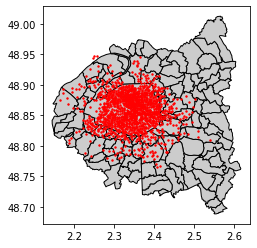

In [25]:
fig, ax = plt.subplots()
data_borders.loc[data_borders['dep'].isin(['75','92','93','94'])].plot(ax=ax, color='0.8', edgecolor='black')
velib.plot(ax=ax, color='red', markersize=2)
plt.show()

In [26]:
print(velib.crs)

epsg:4326


# Calcul de distances (à vol d'oiseau dans un premier temps)

Site intéressant : https://www.kaggle.com/alexisbcook/proximity-analysis

In [27]:
velos.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [28]:
#Creation du dataframe avec point de départ et point d'arrivée

from shapely.geometry import Point
d = {'name': ['depart', 'arrivee'], 'latitude': [ 49, 49.05 ], 'longitude': [2.07198, 2.05], 'geometry': [Point(2.07198, 49), Point(2.05, 49.05)]}
gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")
gdf.head()

,name,latitude,longitude,geometry
0,depart,49.00,2.07198,POINT (2.07198 49.00000)
1,arrivee,49.05,2.05000,POINT (2.05000 49.05000)


CRS : 
- EPSG:3857 : unité=mètres
- EPSG:4326 : unité=degrés

Google Earth : EPSG:4326 

Google Maps : EPSG:3857

The data in Open Street Map database : EPSG:4326

The Open Street Map tiles and the WMS webservice : EPSG 3857


In [29]:
# Si besoin : conversion de crs 4326 à 3857

#gdf = gdf.to_crs(3857)
#gdf.head()

In [30]:
velos2.head()

,ville,name,number,longitude,dept,address,latitude,cp,geometry
0,CERGY,50009 - CER09 - RUE DU BRÛLOIR,50009,2.071980564465145,95,88 RUE DU BRÛLOIR ANGLE RUE DES TOULEUSES POUR...,49.0286831553259,95000,POINT (2.07198 49.02868)
1,PONTOISE,53002 - PON02 - PLACE DE LA LIBÉRATION,53002,2.090817351366363,95,Place de la Libération côté avenue de Verdun -...,49.04468282112117,95300,POINT (2.09082 49.04468)
2,CERGY,50022 - CER22 - GARE CERGY GRAND CENTRE (CB),50022,2.081226367153945,95,BOULEVARD DE L'OISE / RUE DE LA GARE - 95000 C...,49.035362060119965,95000,POINT (2.08123 49.03536)
3,CERGY,50012 - CER12 - PLACE DU HAUT-GENCY,50012,2.044759833610792,95,PLACE DU HAUT DE GENCY ANGLE RUE DES VENDANGES...,49.047822987655735,95000,POINT (2.04476 49.04782)
4,CERGY,50003 - CER03 - LES ESSARTS (CB),50003,2.019491026664161,95,AVENUE DES ESSARTS ANGLE BOULEVARD DE L'OISE -...,49.04205234323104,95000,POINT (2.01949 49.04205)


In [31]:
#Calcul de la distance à vol d'oiseau du point de départ à chacun des points du dataframe "velos2"

#velos2 = velos2.to_crs(3857)

distances = velos2.geometry.distance(gdf.iloc[0].geometry)
distances.head(10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """


0    0.028683
1    0.048491
2    0.036551
3    0.055027
4    0.067257
5    0.045432
6    0.043981
7    0.044863
8    0.048396
9    0.035824
dtype: float64

In [60]:
distances = []
for i in range(len(velos2.geometry)):
  a = (max(velos2.geometry[i].x, velos2.geometry[i+1].x) - min(velos2.geometry[i].x, velos2.geometry[i+1].y))**2 + (max(velos2.geometry[i].y, velos2.geometry[i+1].y) - min(velos2.geometry[i].y, velos2.geometry[i+1].y))**2
  a = a**(1/2)*100
  distances.append(a)

print(distances)
print(len(distances))
print(len(velos2))
#print("Votre trajet est de :", min(distance), "km \n", "La station la plus proche est :",
#      velos2.iloc[ distances.idxmin() ] [[  "name", "address"]] )

[2.471464841591423, 0.9320761001205824, 1.2460927535769883, 0.5770644424693216, 6.533494242194142, 0.034483936507001545, 4.567812665701774, 0.009748084256244738, 5.9003028488302185, 1.308206841130044, 2.163466161427291, 1.6588368596544, 4.823308199100139, 0.6050880636386161, 1.3261617135825077, 6.193541738436141, 3.26585064660417, 1.38446848648357, 0.7948876192017451, 5.879853130821314, 2.102631579230454, 0.5779329131236466, 3.1267251331936934, 0.8386027998135148, 2.3736362384812266, 2.62006635255813, 2.5167358583480848, 3.676016629418249, 3.372738779990895, 1.997436249046558, 4.6698350358690774, 2.520559100992721, 1.8389561115881747, 7.896739266675352, 3.166154680287292, 7.536839746786539, 2.5360827998490265, 3.562675309345061, 0.4675526629590365, 7.989572192582608, 0.5728266198516963]
41
42


NB : j'ai vérifié et il s'agit de la distance euclidienne

In [52]:
velos2.geometry[2:6]

df['lon'] = df.point_object.x
df['lat'] = df.point_object.y

2    POINT (2.08123 49.03536)
3    POINT (2.04476 49.04782)
4    POINT (2.01949 49.04205)
5    POINT (2.08481 49.04358)
Name: geometry, dtype: geometry

In [56]:
lon = velos2.geometry[0].x
lon

velos2.geometry[0].y

49.0286831553259

In [32]:
print( 'Station la plus proche : \n', velos2.iloc[ distances.idxmin() ] [[  "name", "address"]] )
      
#Attention, l'unité n'est pas le mètre -> à convertir
print( '\n \nDistance me séparant de cette station :\n', distances.min())

Station la plus proche : 
 name                                50101 - PÔLE GARE (CB)
address    CHEMIN DE CERGY DEVANT LA GARE - 95010 NEUVILLE
Name: 26, dtype: object

 
Distance me séparant de cette station :
 0.024405199935952873


In [33]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [34]:
import folium

Site utilisé pour folium : https://python-visualization.github.io/folium/quickstart.html

In [35]:
# ATTENTION : ici, latitude puis longitude (=! "geometry" dans les dataframes)
m = folium.Map(location=[49,2], zoom_start=11)

# Marker point de départ
folium.Marker( [ gdf.iloc[0].latitude ,  gdf.iloc[0].longitude ] , popup='<i> Point de départ</i>', tooltip='Vous etes ici!', icon=folium.Icon(color='red')).add_to(m)

# Marker point d'arrivée
folium.Marker( [ gdf.iloc[1].latitude ,  gdf.iloc[1].longitude ] , popup='<i> Point darrivee</i>', tooltip='Arrivee!').add_to(m)

# Marker station la plus proche du point de départ
#latitude = velos2.iloc[ distances.idxmin()] [["latitude"]]
#longitude = velos2.iloc[ distances.idxmin() ] [["longitude"]]
#print(latitude, longitude)

latitude = velos2.iloc[ distances.idxmin()].latitude
longitude = velos2.iloc[ distances.idxmin()].longitude

folium.Marker( [latitude, longitude] , popup='<i>Station</i>',tooltip='Station!' ).add_to(m)

# Affichage de la carte
m

## Calcul de la station la plus proche du point de départ

In [62]:
coord_dep=[2.278414, 48.782519]

In [63]:
# Calcul de la distance en km entre le point de départ et toutes les stations

distances = []
for i in range(len(velos.geometry)):
  a = (max(velos.geometry[i].x, coord_dep[0]) - min(velos.geometry[i].x, coord_dep[0]))**2 + (max(velos.geometry[i].y, coord_dep[1]) - min(velos.geometry[i].y, coord_dep[1]))**2
  a = a**(1/2)*100
  distances.append(a)

In [64]:
#Station la plus proche du point de départ 

i = distances.index(min(distances))

station_dep = [velos["geometry"][i].y, velos["geometry"][i].x]

print( 'Station la plus proche : \n', velos["name"][i] )
print( '\n \nDistance point d arrivee -> station:\n', min(distances), "km")

Station la plus proche : 
 04 - UNIVERSITE - MAIL DES MECHES

 
Distance point d arrivee -> station:
 16.792777756578374 km
